QUESTION 2 : Module 2 segment 1 ou 3 je pense

In [14]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set parameters.
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 25  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

In [3]:
# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx)
# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


In [4]:
print(u0, len(u0), x, len(x), dx)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 41 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ] 41 0.05


In [5]:
# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Equation linéaire :

In [6]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

In [7]:
print(u)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.00000474 1.00008055
 1.00066179 1.00350342 1.01344911 1.03997094 1.09596147 1.19194524
 1.32792225 1.48908019 1.65023813 1.78697346 1.88565437 1.94584649
 1.97483853 1.97904114 1.95782492 1.90349889 1.80794666 1.6720605
 1.5109177  1.34976168 1.21302179 1.11426508 1.05349172 1.02165805
 1.00750975 1.00220414 1.00053964 1.0001081  1.00001725]


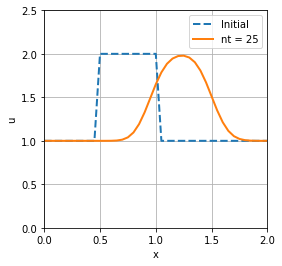

In [8]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

Equation non-linéaire :

In [9]:
# Set parameters.
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 10  # number of time steps
dt = 0.02  # time-step size

x = numpy.linspace(0.0, L, num=nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

Vectorized operation

In [10]:
# Compute the solution using Euler's method and array slicing.
u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])

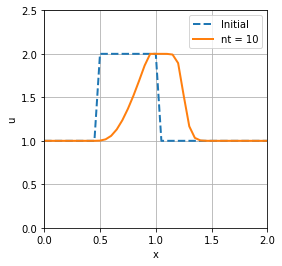

In [11]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

Correction pour la convection de l'equation linéaire :

In [12]:
def linear_convection_cfl(nx, L=2.0, c=1.0, sigma=0.5, nt=20):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).
    Here, the time-step size is calculated based on a CFL constraint.

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    sigma : float, optional
        CFL constraint; default: 0.5.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = numpy.linspace(0.0, L, num=nx)
    # Compute the time-step size based on the CFL constraint.
    dt = sigma * dx / c
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

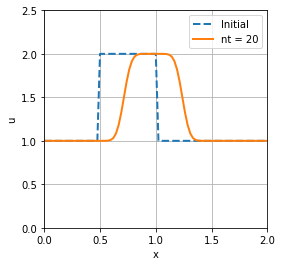

In [13]:
linear_convection_cfl(85)

In [17]:
sympy.init_printing()
x = sympy.symbols('x')
x

Question 1 peut etre simplification via sumpy ou autre 

In [ ]:
eq1 = (d2zw-k**2*w)
eq2 = -k**2*c*dtc-d2zc/Ra+k**2*c
eq3 = -2/numpy.sqrt(PI)*numpy.sqrt(Ra/(4*t))*numpy.exp(-z*numpy.sqrt(Ra/(4*t)))**2